## Operations done on different df's
df - cleaned

df1 - cleaned> NearMiss Undersample

df2 - cleaned> SMOTE Oversample

df3 - cleaned> NearMiss Undersample> train-test split

df4 - cleaned> SMOTE Oversample> train-test split

## EDA on Different Variations of  Dataset

In [1]:
#Import relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

In [2]:
# Let's start with the cleaned df without oversampled or undersampled data
df = pd.read_csv("df.csv")

In [3]:
df.head()

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  

[5 rows x 21 columns]

In [4]:
df.describe(include="all").transpose()

count       mean        std   min     25%     50%      75%  \
aluminium    7996.0   0.666396   1.265323  0.00  0.0400   0.070   0.2800   
ammonia      7996.0  14.278212   8.878930 -0.08  6.5775  14.130  22.1325   
arsenic      7996.0   0.161477   0.252632  0.00  0.0300   0.050   0.1000   
barium       7996.0   1.567928   1.216227  0.00  0.5600   1.190   2.4825   
cadmium      7996.0   0.042803   0.036049  0.00  0.0080   0.040   0.0700   
chloramine   7996.0   2.177589   2.567210  0.00  0.1000   0.530   4.2400   
chromium     7996.0   0.247300   0.270663  0.00  0.0500   0.090   0.4400   
copper       7996.0   0.805940   0.653595  0.00  0.0900   0.750   1.3900   
flouride     7996.0   0.771646   0.435423  0.00  0.4075   0.770   1.1600   
bacteria     7996.0   0.319714   0.329497  0.00  0.0000   0.220   0.6100   
viruses      7996.0   0.328706   0.378113  0.00  0.0020   0.008   0.7000   
lead         7996.0   0.099431   0.058169  0.00  0.0480   0.102   0.1510   
nitrates     7996.0   9.819250   5.541977  0.00  5.0000   9.930  14.6100   
nitrites     7996.0   1.329846   0.573271  0.00  1.0000   1.420   1.7600   
mercury      7996.0   0.005193   0.002967  0.00  0.0030   0.005   0.0080   
perchlorate  7996.0  16.465266  17.688827  0.00  2.1700   7.745  29.4875   
radium       7996.0   2.920106   2.322805  0.00  0.8200   2.410   4.6700   
selenium     7996.0   0.049684   0.028773  0.00  0.0200   0.050   0.0700   
silver       7996.0   0.147811   0.143569  0.00  0.0400   0.080   0.2400   
uranium      7996.0   0.044672   0.026906  0.00  0.0200   0.050   0.0700   
is_safe      7996.0   0.114057   0.317900  0.00  0.0000   0.000   0.0000   

               max  
aluminium     5.05  
ammonia      29.84  
arsenic       1.05  
barium        4.94  
cadmium       0.13  
chloramine    8.68  
chromium      0.90  
copper        2.00  
flouride      1.50  
bacteria      1.00  
viruses       1.00  
lead          0.20  
nitrates     19.83  
nitrites      2.93  
mercury       0.01  
perchlorate  60.01  
radium        7.99  
selenium      0.10  
silver        0.50  
uranium       0.09  
is_safe       1.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [36]:
def skew_count(df):
#     create an empty dict to store the values of unique values of each columns in the df 
    dict_unicount = {}
#     get the list of all coluns names and iterate through them
    for i in list(df.columns):
#         create and add new key value pair:{"column_name":*number_of unique_values*} to dict_unicount
        dict_unicount[i] = df[i].value_counts().shape[0]
#     create a df with index as column_names
    df_unique_count = pd.DataFrame(dict_unicount,index=["unique count"]).transpose()
    
#     do the same for skew
    dict_skew = {}
    for i in list(df.columns):
        dict_skew[i] = df[i].skew()
    df_skew = pd.DataFrame(dict_skew,index=["skew"]).transpose()
    return(df_skew.join(df_unique_count))
skew_count(df)

skew  unique count
aluminium    2.013463           495
ammonia      0.026804          2563
arsenic      1.985241           107
barium       0.660957           480
cadmium      0.478226            23
chloramine   0.888123           812
chromium     1.028188            91
copper       0.253558           201
flouride    -0.039733           151
bacteria     0.554417           101
viruses      0.424567            61
lead        -0.060601           200
nitrates    -0.042060          1803
nitrites    -0.498212           280
mercury     -0.081726            11
perchlorate  0.937767          2999
radium       0.548391           735
selenium     0.010495            11
silver       1.029489            51
uranium     -0.027040            10
is_safe      2.428682             2

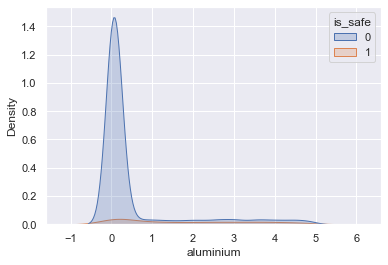

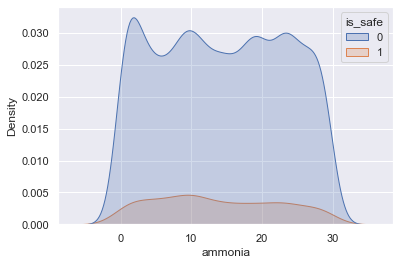

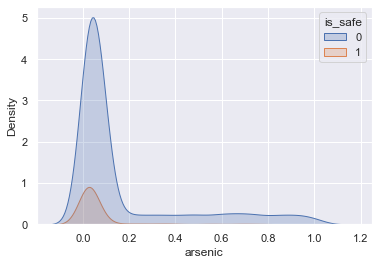

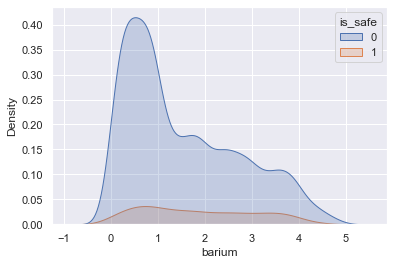

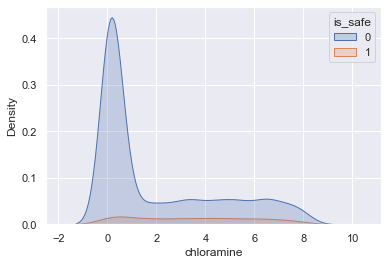

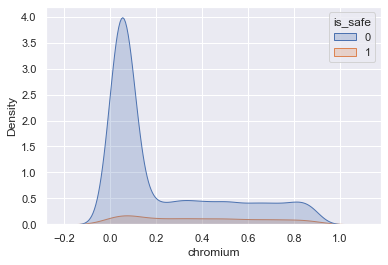

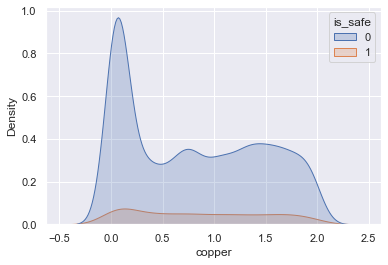

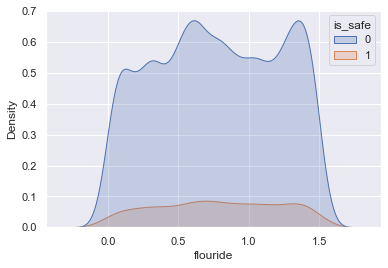

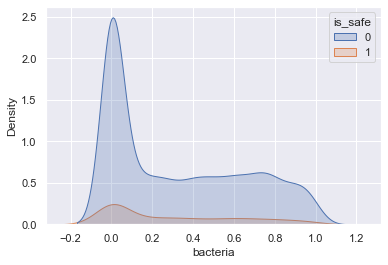

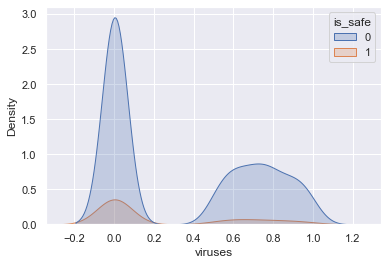

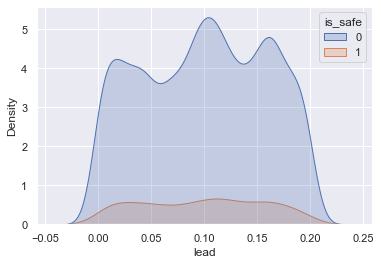

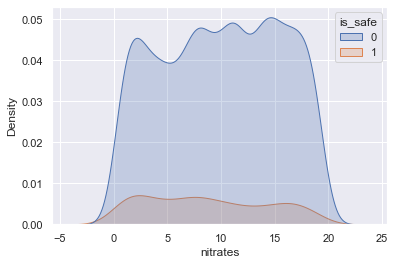

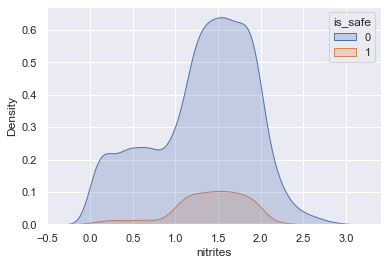

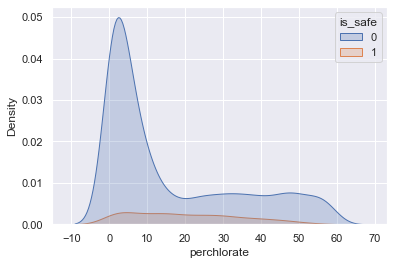

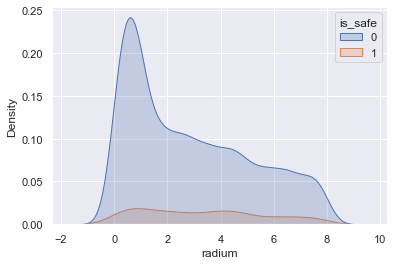

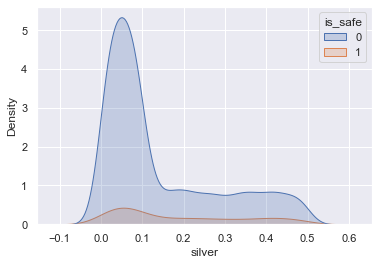

In [7]:
def kdeplots(df,y):
    for i in range(len(df.columns)):
        if len(df[df.columns[i]].unique())>50:
            sns.kdeplot(df[df.columns[i]],shade=True,hue=y)
            plt.show()
kdeplots(df,df["is_safe"])

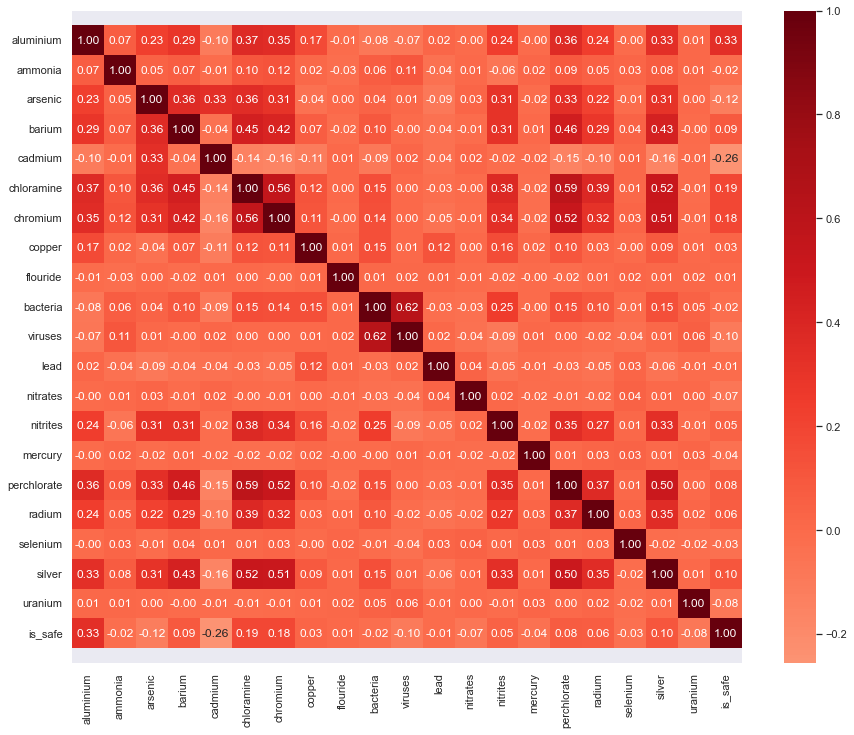

In [8]:
def heatmaps(df):
    fig, ax = plt.subplots(figsize=(15,12))
    sns.heatmap(df.corr(), center=0, cmap='Reds',annot=True, fmt=".2f")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    # ax.set_title("Factors affecting left")
heatmaps(df)

In [9]:
class corplotsss():
    
        
    def high_corr(self,df):
        self.df = df
    
        # Correlation tells relation between two attributes.
        # Correlation requires continous self.df. 

        #sets the number of features considered
        size = len(self.df.columns)

        #create a self.dfframe with only 'size' features
        # self.df=self.dfset.iloc[:,:size] 

        #get the names of all the columns
        self.cols=self.df.columns 

        # Calculates pearson co-efficient for all combinations
        self.df_corr = self.df.corr()

        # Set the threshold to select only only highly correlated attributes
        threshold = 0.5

        # List of pairs along with correlation above threshold
        corr_list = []

        #Search for the highly correlated pairs
        for i in range(0,size): #for 'size' features
            for j in range(i+1,size): #avoid repetition
                if (abs(self.df_corr.iloc[i,j] )>= threshold and abs(self.df_corr.iloc[i,j]) < 1):
                    corr_list.append([self.df_corr.iloc[i,j],i,j]) #store correlation and columns index

        #Sort to show higher ones first            
        s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
        self.s_corr_list = s_corr_list
        #Print correlations and column names
        for v,i,j in s_corr_list:
            print ("%s and %s = %.2f" % (self.cols[i],self.cols[j],v))
    

        # Strong correlation is observed between the following pairs
        # This represents an opportunity to reduce the feature set through transformations such as PCA
        
    def high_corr_plot(self):
        for v,i,j in self.s_corr_list:
            sns.pairplot(df, hue="is_safe", height=6, x_vars=self.cols[i],y_vars=self.cols[j] )
            plt.show()

corplotss = corplotsss()
corplotss.high_corr(df)

bacteria and viruses = 0.62
chloramine and perchlorate = 0.59
chloramine and chromium = 0.56
chromium and perchlorate = 0.52
chloramine and silver = 0.52
chromium and silver = 0.51
perchlorate and silver = 0.50


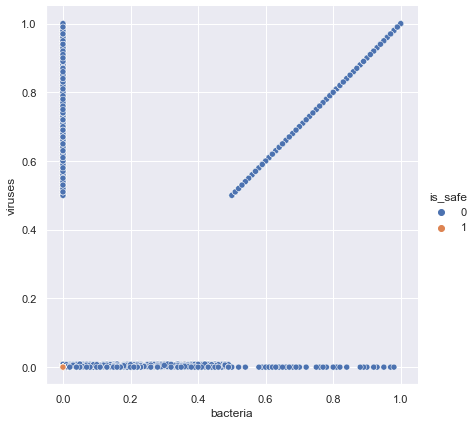

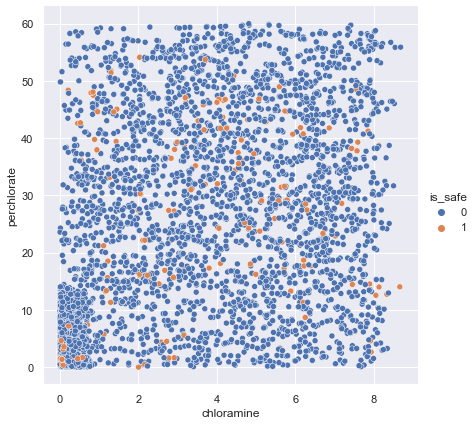

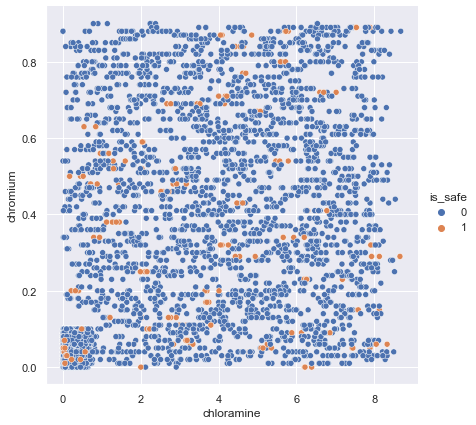

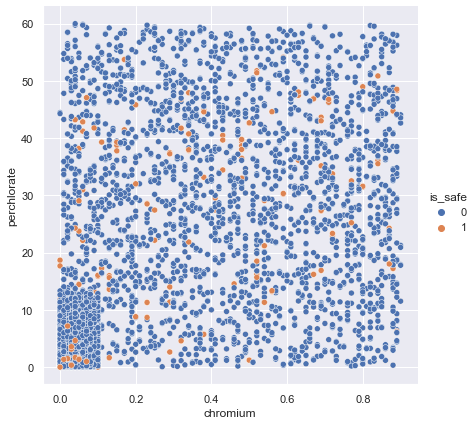

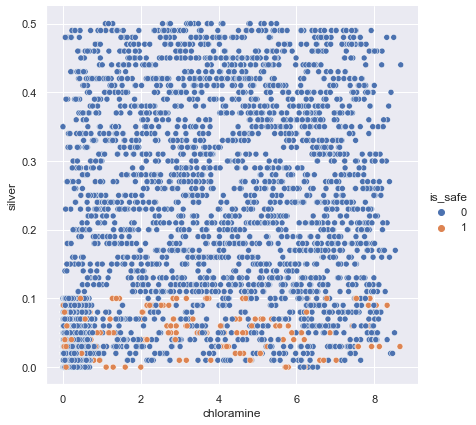

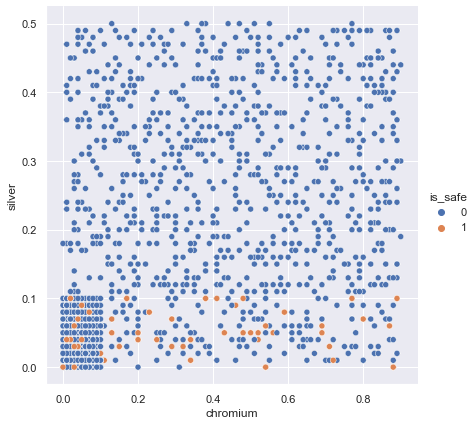

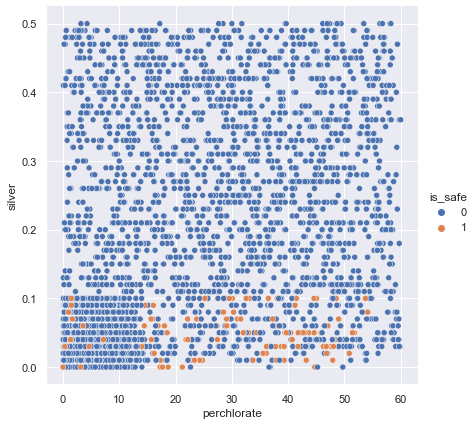

In [10]:
corplotss.high_corr_plot()

In [11]:
# for j in range(0, len(features), 4):  
#     for i, item in enumerate(features[j:j+4],1):
#         plt.subplot(2, 2, i)
#         sns.scatterplot(data=df,x=item, y=item,hue="is_safe")
#     plt.show()

<AxesSubplot:xlabel='aluminium', ylabel='aluminium'>

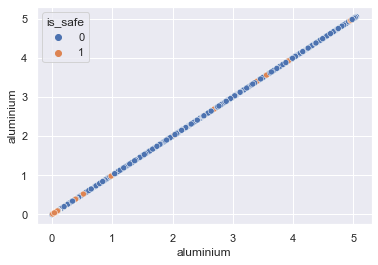

In [12]:
sns.scatterplot(data=df, x="aluminium" ,hue="is_safe", y="aluminium")

<AxesSubplot:xlabel='silver', ylabel='is_safe'>

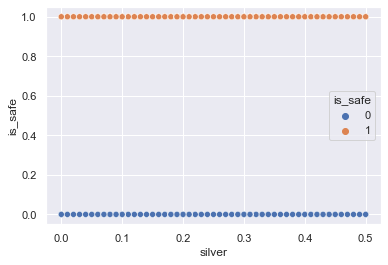

In [13]:
sns.scatterplot(data=df, x="silver" ,hue="is_safe", y="is_safe")

### Do for other df's

In [14]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")
df4 = pd.read_csv("df4.csv")

In [15]:
df1.describe(include="all").transpose()

count       mean        std   min     25%      50%      75%  \
aluminium    1824.0   0.968087   1.447556  0.00  0.0500   0.0900   1.6500   
ammonia      1824.0  13.873997   8.554967 -0.01  6.8375  12.2700  21.7925   
arsenic      1824.0   0.064558   0.124516  0.00  0.0200   0.0400   0.0600   
barium       1824.0   1.380367   1.131363  0.00  0.4900   0.9600   2.1300   
cadmium      1824.0   0.031215   0.032431  0.00  0.0050   0.0100   0.0600   
chloramine   1824.0   2.038114   2.468504  0.00  0.0900   0.4900   3.9100   
chromium     1824.0   0.237982   0.266506  0.00  0.0400   0.0900   0.4100   
copper       1824.0   0.757895   0.635330  0.00  0.0900   0.6700   1.3200   
flouride     1824.0   0.791480   0.429828  0.00  0.4300   0.8000   1.1600   
bacteria     1824.0   0.275970   0.313113  0.00  0.0000   0.1500   0.5300   
viruses      1824.0   0.279881   0.363408  0.00  0.0010   0.0070   0.6400   
lead         1824.0   0.098268   0.056178  0.00  0.0480   0.1015   0.1450   
nitrates     1824.0   7.475044   4.986786  0.00  3.1000   7.1000  10.4875   
nitrites     1824.0   1.200740   0.556399  0.00  0.7900   1.2900   1.6300   
mercury      1824.0   0.005012   0.003006  0.00  0.0020   0.0050   0.0080   
perchlorate  1824.0  12.207944  14.112791  0.00  1.2800   4.7350  21.5250   
radium       1824.0   2.399742   2.124673  0.00  0.6300   1.7250   3.8525   
selenium     1824.0   0.046727   0.029074  0.00  0.0200   0.0500   0.0700   
silver       1824.0   0.130005   0.136910  0.00  0.0400   0.0700   0.1900   
uranium      1824.0   0.041617   0.026845  0.00  0.0200   0.0400   0.0600   
is_safe      1824.0   0.500000   0.500137  0.00  0.0000   0.5000   1.0000   

               max  
aluminium     5.00  
ammonia      29.80  
arsenic       1.03  
barium        4.53  
cadmium       0.13  
chloramine    8.66  
chromium      0.90  
copper        1.99  
flouride      1.50  
bacteria      1.00  
viruses       1.00  
lead          0.20  
nitrates     19.75  
nitrites      2.73  
mercury       0.01  
perchlorate  57.00  
radium        7.93  
selenium      0.10  
silver        0.50  
uranium       0.09  
is_safe       1.00

In [16]:
skew_count(df1)

skew  unique count
aluminium    1.370664           380
ammonia      0.224930          1250
arsenic      4.897647            75
barium       0.850397           385
cadmium      0.882228            23
chloramine   0.973384           528
chromium     1.109068            91
copper       0.362745           197
flouride    -0.092641           150
bacteria     0.765049           101
viruses      0.670820            61
lead        -0.028539           198
nitrates     0.519291           877
nitrites    -0.428008           225
mercury     -0.048372            11
perchlorate  1.137883          1094
radium       0.885945           590
selenium     0.082314            11
silver       1.313453            51
uranium      0.121014            10
is_safe      0.000000             2

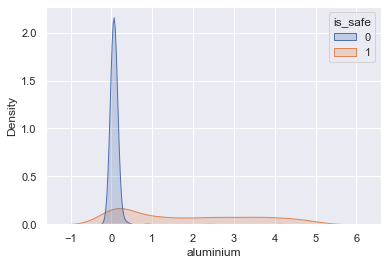

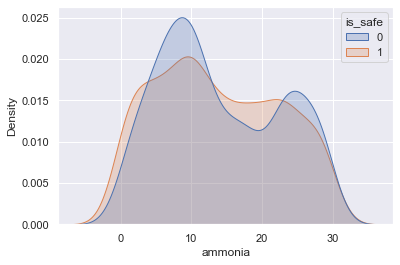

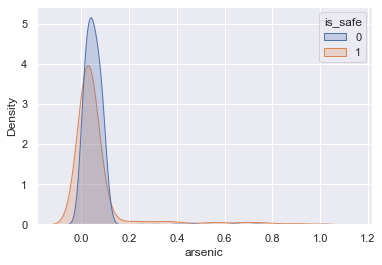

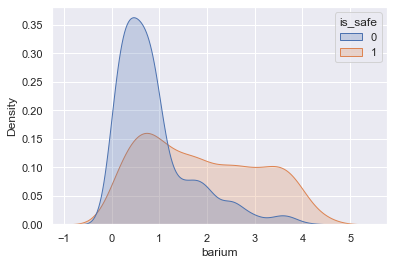

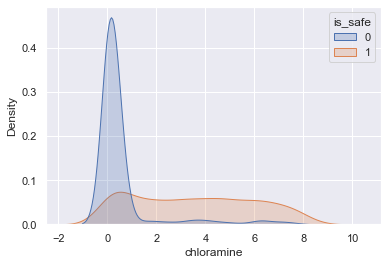

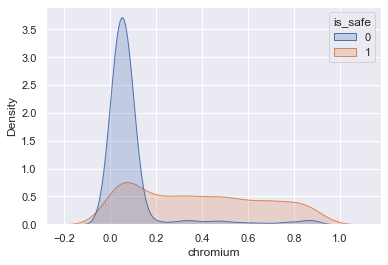

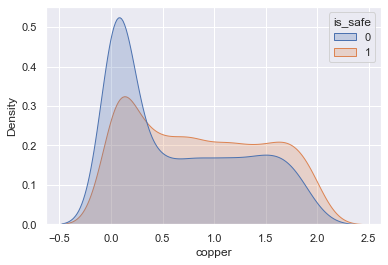

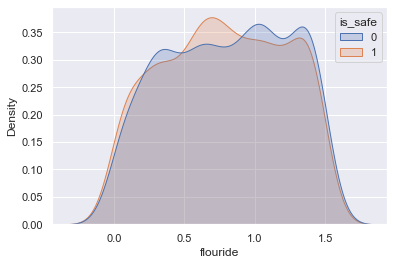

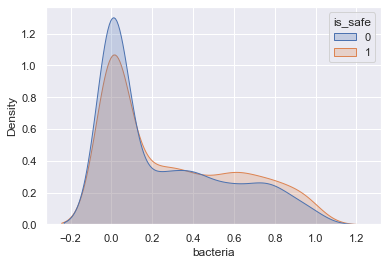

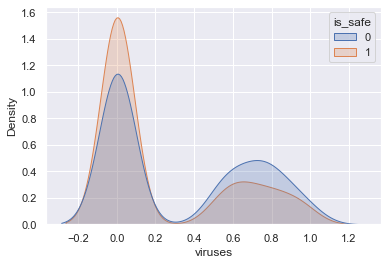

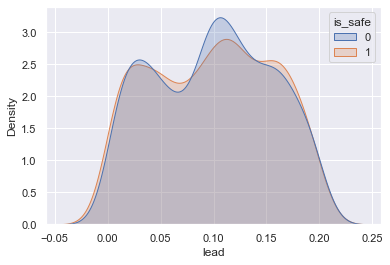

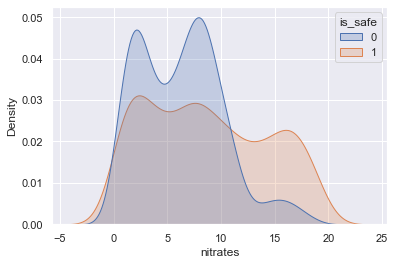

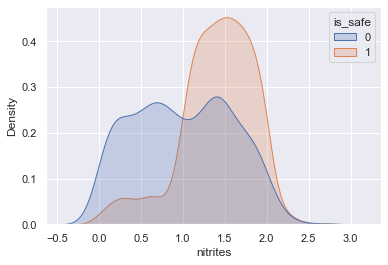

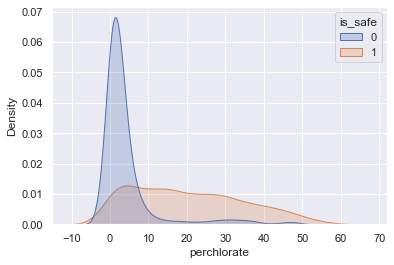

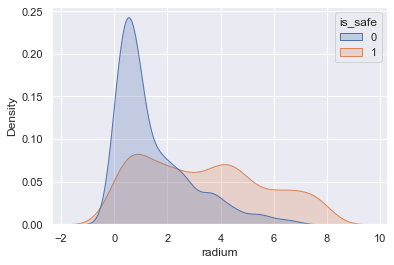

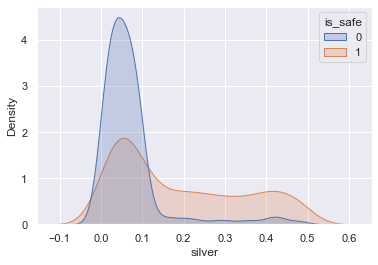

In [17]:
kdeplots(df1,df1["is_safe"])

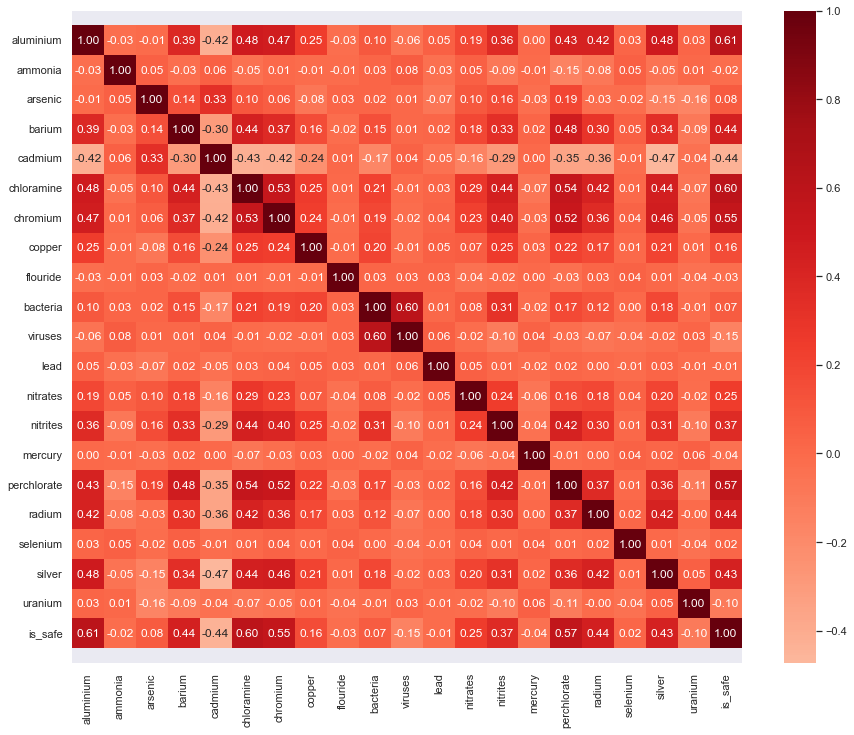

In [18]:
heatmaps(df1)

aluminium and is_safe = 0.61
bacteria and viruses = 0.60
chloramine and is_safe = 0.60
perchlorate and is_safe = 0.57
chromium and is_safe = 0.55
chloramine and perchlorate = 0.54
chloramine and chromium = 0.53
chromium and perchlorate = 0.52


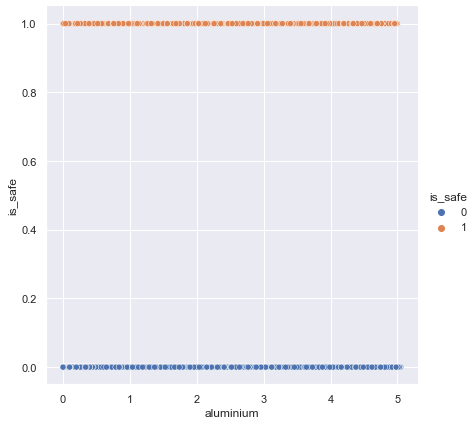

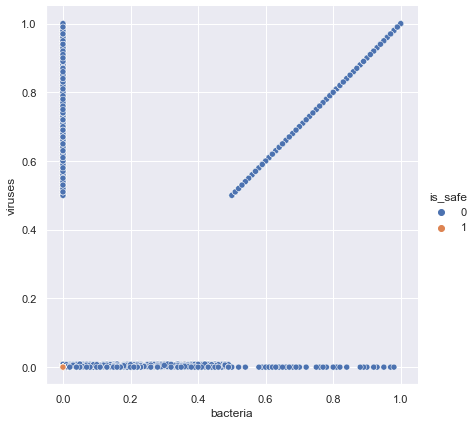

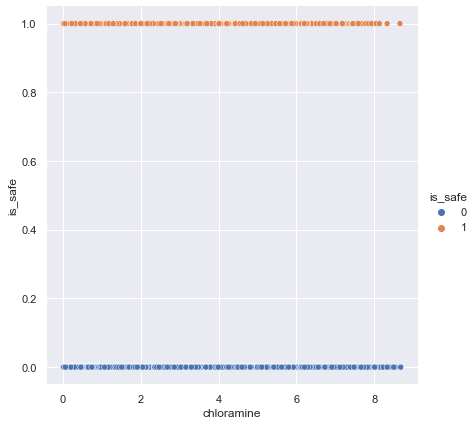

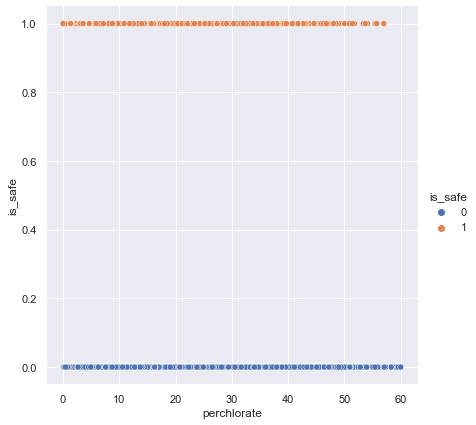

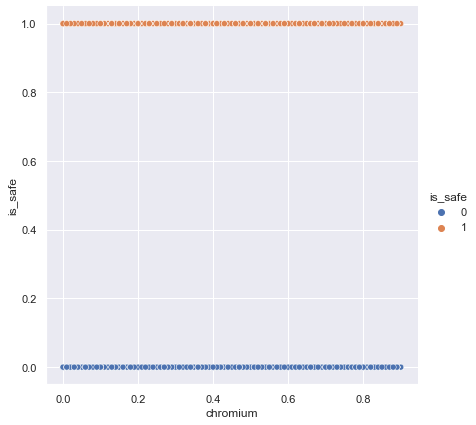

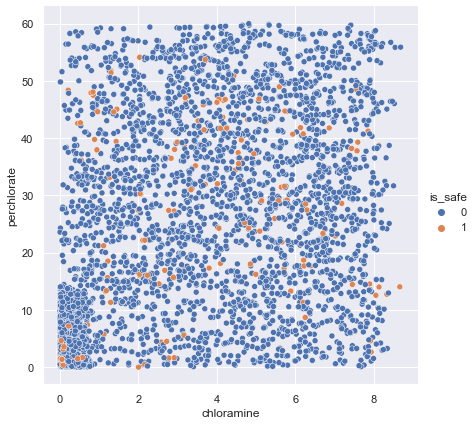

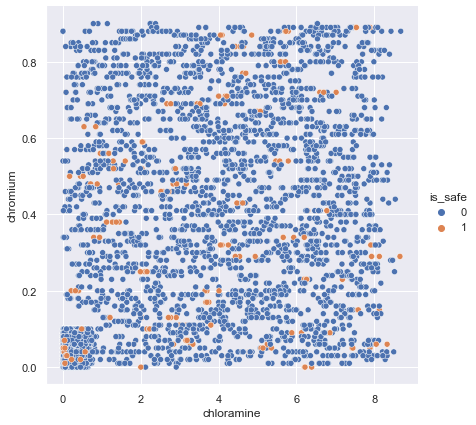

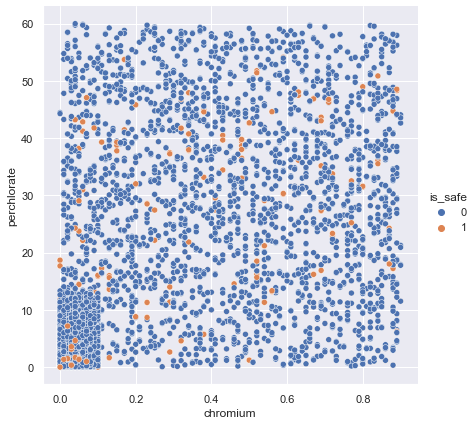

In [19]:
corplots1 = corplotsss()
corplots1.high_corr(df1)
corplots1.high_corr_plot()

In [20]:
df2.describe(include="all").transpose()

count       mean        std   min       25%        50%  \
aluminium    14168.0   1.165297   1.440606  0.00  0.060000   0.250000   
ammonia      14168.0  14.054196   8.738119 -0.08  6.540000  13.594503   
arsenic      14168.0   0.123111   0.214389  0.00  0.020000   0.040000   
barium       14168.0   1.692570   1.156207  0.00  0.700000   1.490000   
cadmium      14168.0   0.031606   0.033917  0.00  0.004839   0.010000   
chloramine   14168.0   2.777385   2.536655  0.00  0.245080   2.295020   
chromium     14168.0   0.307165   0.265497  0.00  0.060000   0.246315   
copper       14168.0   0.832859   0.607128  0.00  0.240000   0.790881   
flouride     14168.0   0.774839   0.402453  0.00  0.461480   0.777142   
bacteria     14168.0   0.312000   0.305401  0.00  0.000000   0.230000   
viruses      14168.0   0.284504   0.346874  0.00  0.002000   0.008000   
lead         14168.0   0.098582   0.053565  0.00  0.054266   0.100268   
nitrates     14168.0   9.309819   5.557521  0.00  4.295813   9.053813   
nitrites     14168.0   1.360314   0.506059  0.00  1.135039   1.440000   
mercury      14168.0   0.005025   0.002784  0.00  0.002901   0.005000   
perchlorate  14168.0  18.013750  16.367026  0.00  3.359733  13.010000   
radium       14168.0   3.099019   2.237402  0.00  1.011750   2.761003   
selenium     14168.0   0.048149   0.026921  0.00  0.026648   0.050000   
silver       14168.0   0.165150   0.140173  0.00  0.050000   0.100000   
uranium      14168.0   0.042232   0.025166  0.00  0.020000   0.040000   
is_safe      14168.0   0.500000   0.500018  0.00  0.000000   0.500000   

                   75%    max  
aluminium     2.210000   5.05  
ammonia      21.768810  29.84  
arsenic       0.080000   1.05  
barium        2.595311   4.94  
cadmium       0.060000   0.13  
chloramine    4.947975   8.68  
chromium      0.520000   0.90  
copper        1.346449   2.00  
flouride      1.100716   1.50  
bacteria      0.560000   1.00  
viruses       0.620000   1.00  
lead          0.142000   0.20  
nitrates     14.250000  19.83  
nitrites      1.708843   2.93  
mercury       0.007000   0.01  
perchlorate  30.178904  60.01  
radium        4.780000   7.99  
selenium      0.070000   0.10  
silver        0.270000   0.50  
uranium       0.060000   0.09  
is_safe       1.000000   1.00

In [21]:
skew_count(df2)

skew  unique count
aluminium    1.015036          6594
ammonia      0.090362          8490
arsenic      2.529406          5348
barium       0.467276          6506
cadmium      0.972192          5519
chloramine   0.453618          6820
chromium     0.571007          5845
copper       0.187310          6089
flouride    -0.050745          5917
bacteria     0.588006          5050
viruses      0.661718          5362
lead        -0.037867          6014
nitrates     0.081287          7833
nitrites    -0.687443          6227
mercury      0.007003          5305
perchlorate  0.715315          9040
radium       0.431836          6594
selenium     0.058766          5247
silver       0.766034          5747
uranium      0.121016          5040
is_safe      0.000000             2

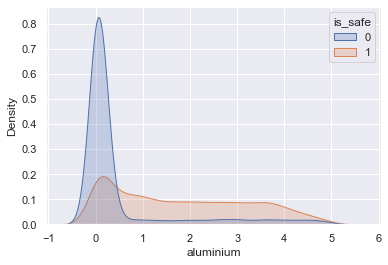

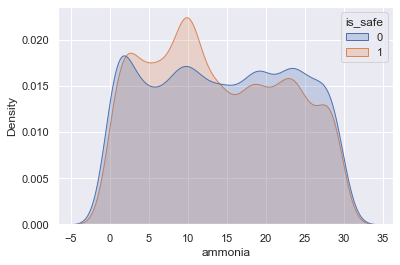

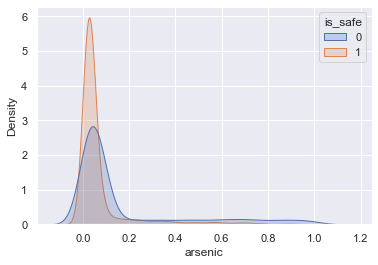

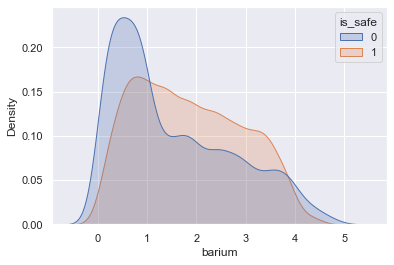

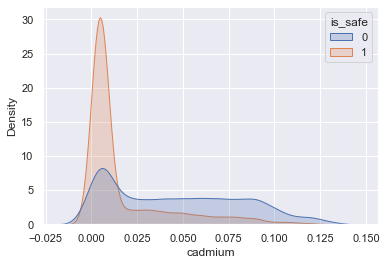

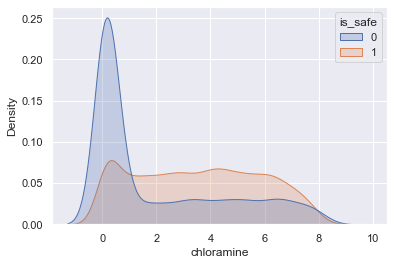

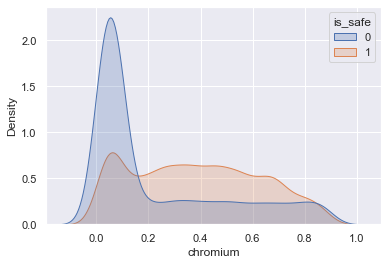

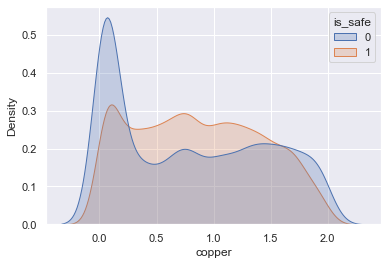

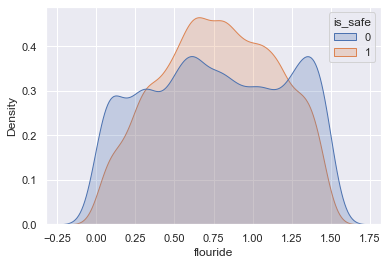

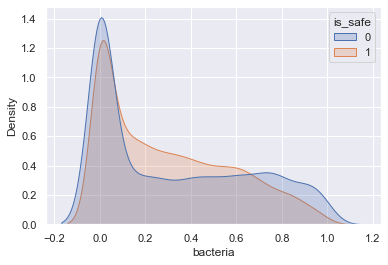

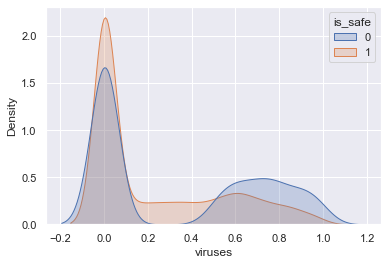

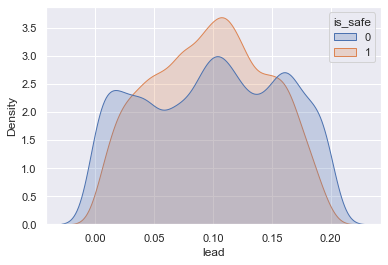

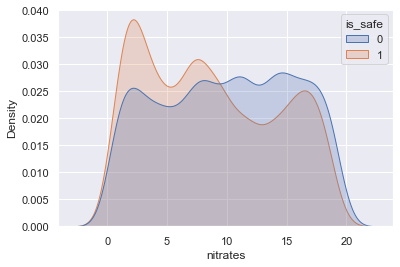

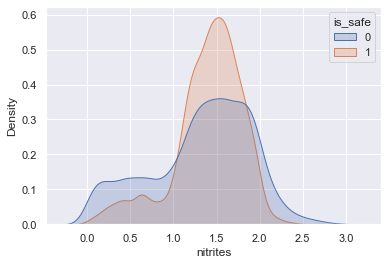

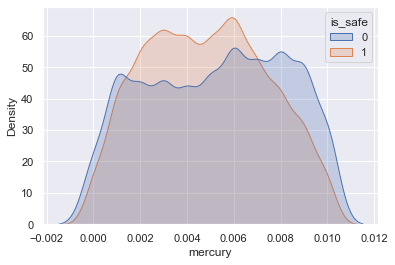

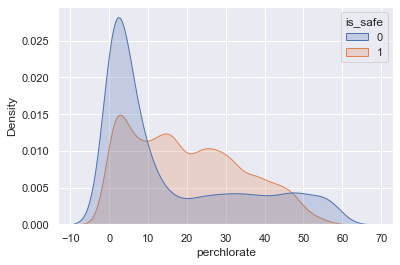

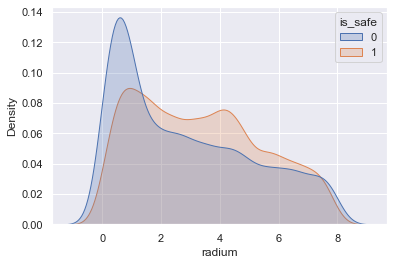

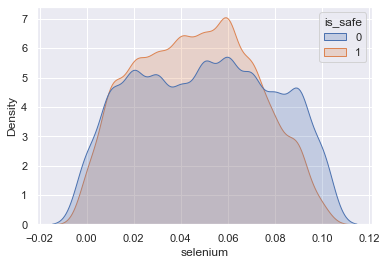

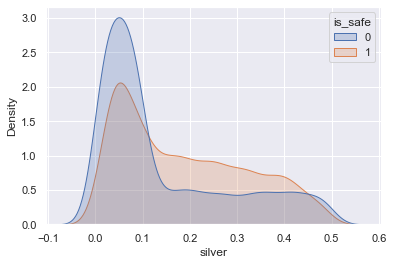

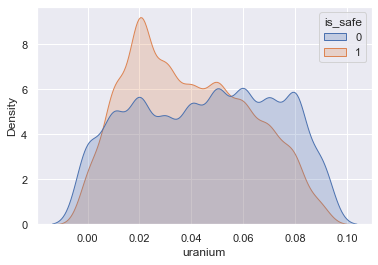

In [22]:
kdeplots(df2,df2["is_safe"])

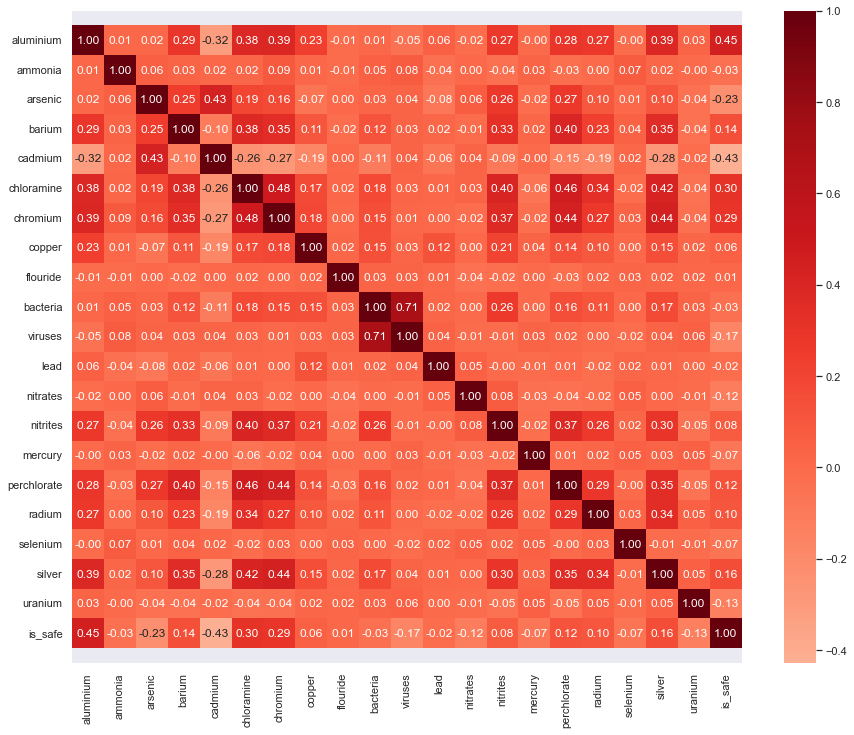

In [23]:
heatmaps(df2)

bacteria and viruses = 0.71


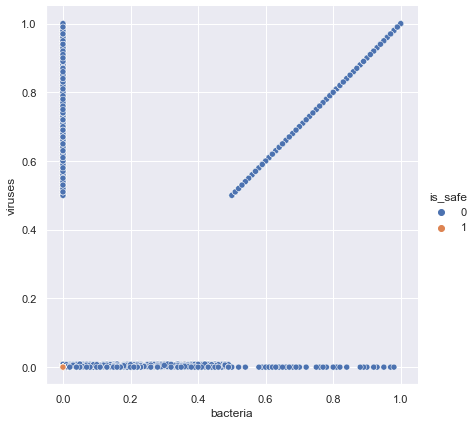

In [24]:
corplots2 = corplotsss()
corplots2.high_corr(df2)
corplots2.high_corr_plot()

In [25]:
df3.describe(include="all").transpose()

count       mean        std    min     25%     50%      75%  \
aluminium    1408.0   0.977670   1.456616  0.000  0.0400   0.090   1.7125   
ammonia      1408.0  14.341307   8.438908 -0.010  7.5875  13.270  21.9225   
arsenic      1408.0   0.065063   0.124668  0.000  0.0200   0.040   0.0600   
barium       1408.0   1.385455   1.127450  0.000  0.4800   0.975   2.1400   
cadmium      1408.0   0.031237   0.032528  0.000  0.0050   0.010   0.0600   
chloramine   1408.0   2.029432   2.469704  0.000  0.0900   0.480   3.9100   
chromium     1408.0   0.235795   0.264689  0.000  0.0500   0.090   0.4000   
copper       1408.0   0.749190   0.632877  0.000  0.0900   0.660   1.3025   
flouride     1408.0   0.793651   0.427292  0.000  0.4300   0.810   1.1600   
bacteria     1408.0   0.281378   0.316606  0.000  0.0000   0.150   0.5400   
viruses      1408.0   0.291624   0.366973  0.000  0.0020   0.007   0.6500   
lead         1408.0   0.099943   0.056564  0.001  0.0490   0.104   0.1470   
nitrates     1408.0   7.863466   4.856632  0.010  3.8200   7.610  10.6225   
nitrites     1408.0   1.221278   0.549868  0.000  0.8500   1.330   1.6400   
mercury      1408.0   0.005009   0.002977  0.000  0.0020   0.005   0.0070   
perchlorate  1408.0  11.544915  13.465515  0.010  1.2800   4.365  19.5925   
radium       1408.0   2.365909   2.103754  0.000  0.6400   1.700   3.7400   
selenium     1408.0   0.047003   0.028888  0.000  0.0200   0.050   0.0700   
silver       1408.0   0.130973   0.137957  0.000  0.0400   0.070   0.1900   
uranium      1408.0   0.041825   0.027235  0.000  0.0200   0.040   0.0700   
is_safe      1408.0   0.500000   0.500178  0.000  0.0000   0.500   1.0000   

               max  
aluminium     5.00  
ammonia      29.80  
arsenic       1.00  
barium        4.53  
cadmium       0.13  
chloramine    8.66  
chromium      0.90  
copper        1.99  
flouride      1.50  
bacteria      1.00  
viruses       1.00  
lead          0.20  
nitrates     19.75  
nitrites      2.73  
mercury       0.01  
perchlorate  57.00  
radium        7.93  
selenium      0.10  
silver        0.50  
uranium       0.09  
is_safe       1.00

In [26]:
skew_count(df3)

skew  unique count
aluminium    1.349998           338
ammonia      0.169793          1042
arsenic      4.831039            64
barium       0.818362           363
cadmium      0.886939            23
chloramine   0.986630           476
chromium     1.134025            91
copper       0.383478           195
flouride    -0.109835           149
bacteria     0.732908           100
viruses      0.611895            61
lead        -0.069414           193
nitrates     0.438731           762
nitrites    -0.471194           221
mercury     -0.050709            11
perchlorate  1.178842           896
radium       0.932923           531
selenium     0.072726            11
silver       1.299440            51
uranium      0.105694            10
is_safe      0.000000             2

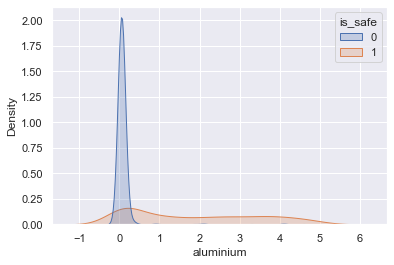

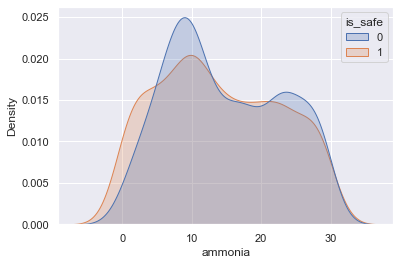

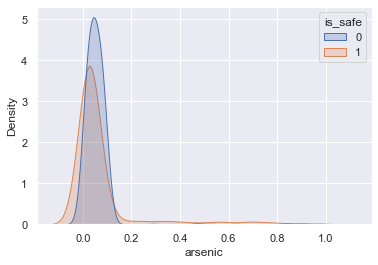

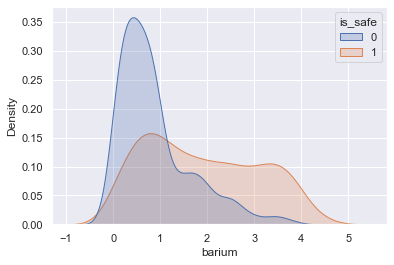

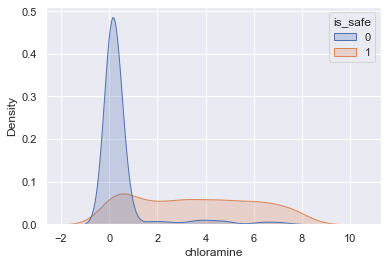

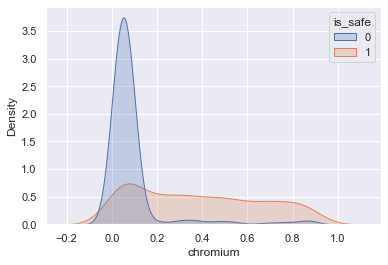

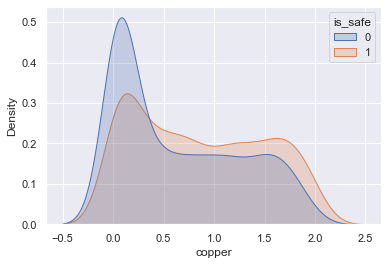

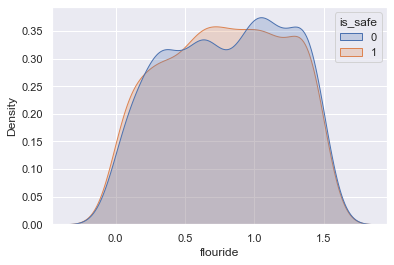

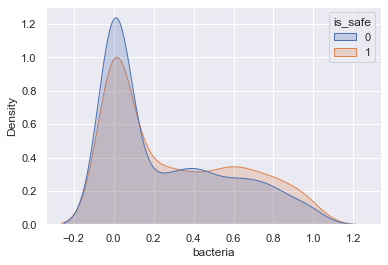

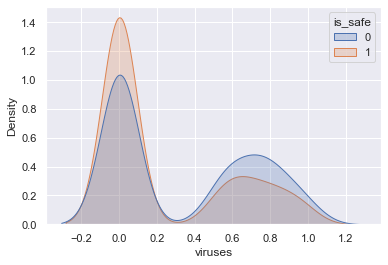

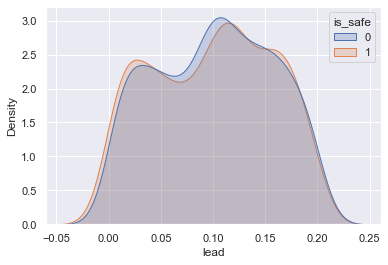

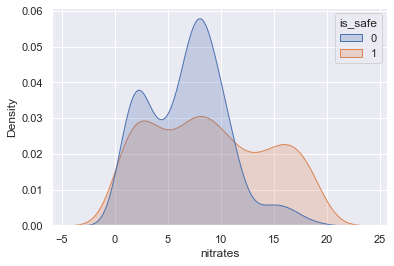

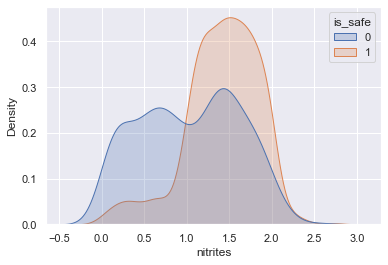

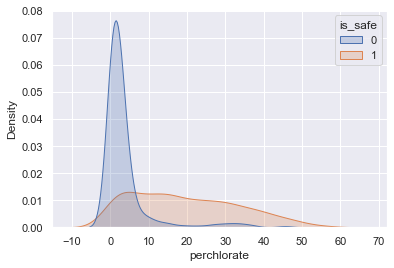

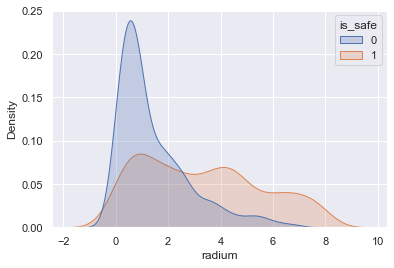

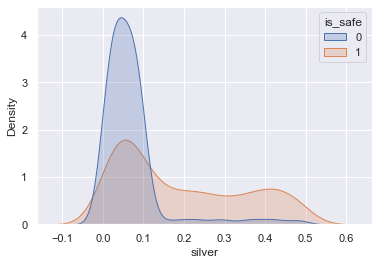

In [27]:
kdeplots(df3,df3["is_safe"])

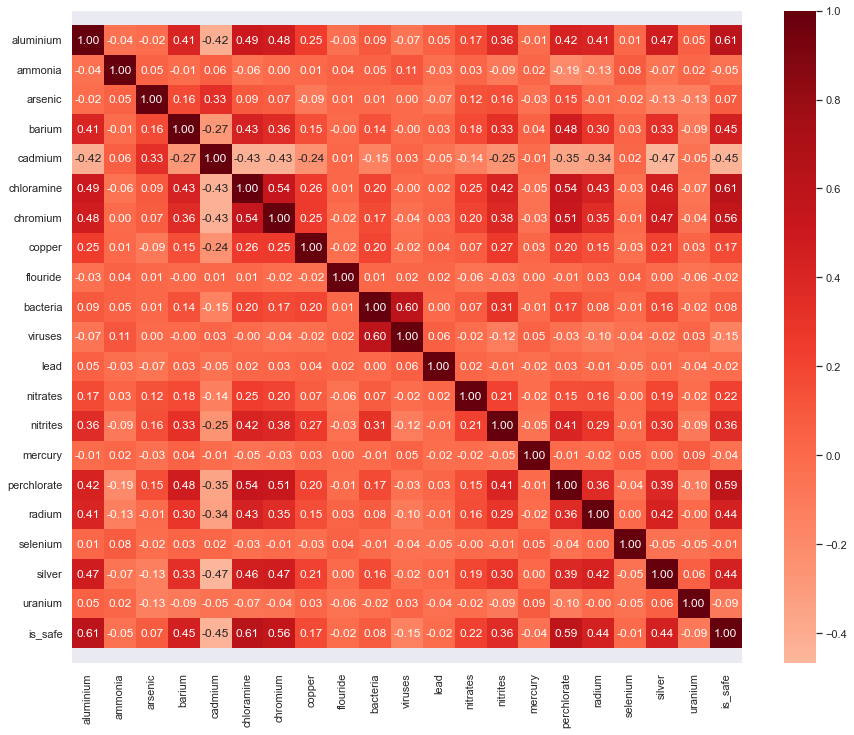

In [28]:
heatmaps(df3)

chloramine and is_safe = 0.61
aluminium and is_safe = 0.61
bacteria and viruses = 0.60
perchlorate and is_safe = 0.59
chromium and is_safe = 0.56
chloramine and perchlorate = 0.54
chloramine and chromium = 0.54
chromium and perchlorate = 0.51


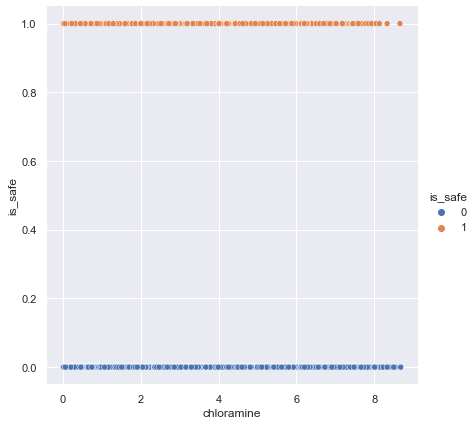

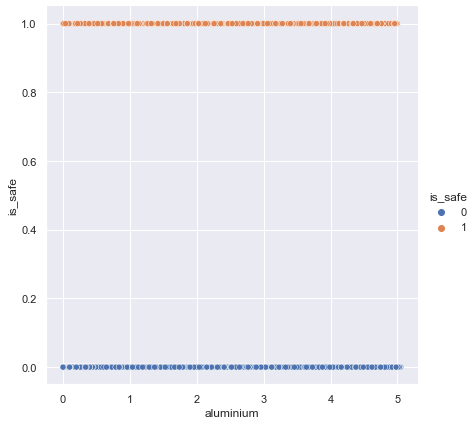

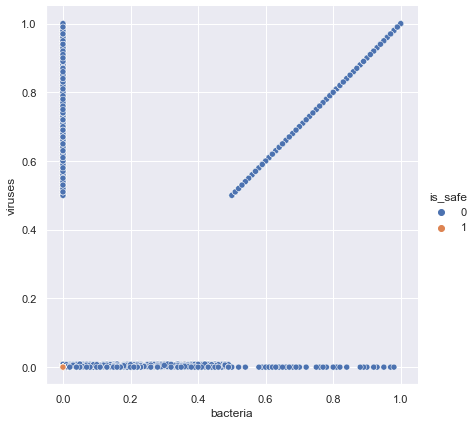

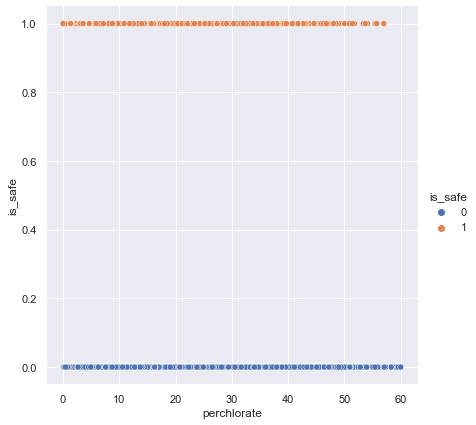

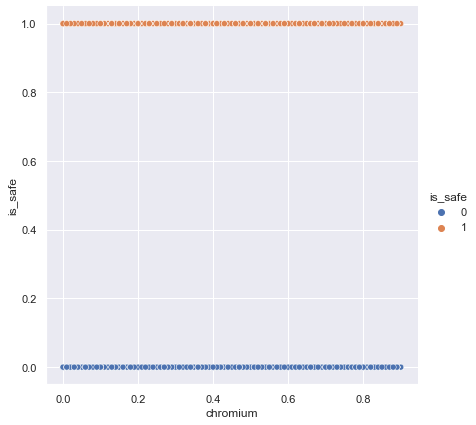

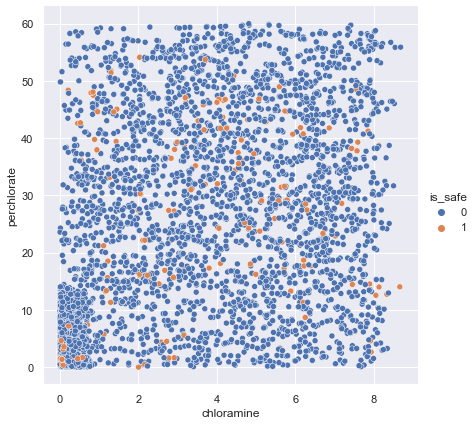

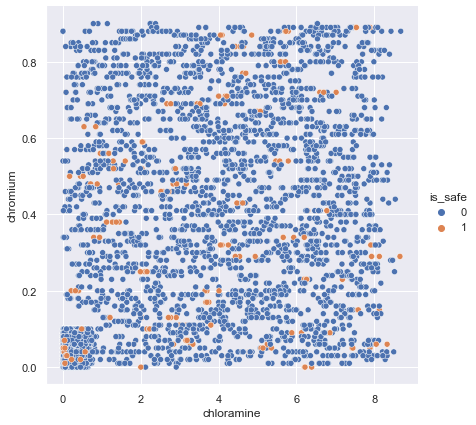

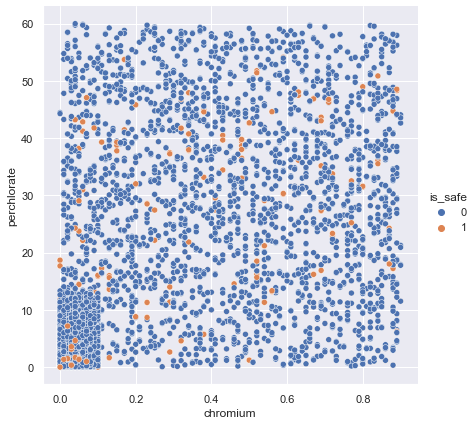

In [29]:
corplots3 = corplotsss()
corplots3.high_corr(df3)
corplots3.high_corr_plot()

In [30]:
df4.describe(include="all").transpose()

count       mean        std    min       25%        50%  \
aluminium    11384.0   1.174637   1.438927  0.000  0.060000   0.255552   
ammonia      11384.0  14.188378   8.757692 -0.080  6.789945  13.730000   
arsenic      11384.0   0.121832   0.210804  0.000  0.020000   0.040000   
barium       11384.0   1.693213   1.148837  0.000  0.700000   1.511766   
cadmium      11384.0   0.031441   0.033769  0.000  0.004997   0.010000   
chloramine   11384.0   2.753028   2.528333  0.000  0.249103   2.273529   
chromium     11384.0   0.302181   0.265139  0.000  0.060000   0.230000   
copper       11384.0   0.831816   0.607879  0.000  0.240000   0.790000   
flouride     11384.0   0.779973   0.400331  0.000  0.470000   0.783287   
bacteria     11384.0   0.312206   0.307333  0.000  0.000000   0.230000   
viruses      11384.0   0.287557   0.347048  0.000  0.002000   0.008000   
lead         11384.0   0.099444   0.053771  0.001  0.055637   0.101941   
nitrates     11384.0   9.474970   5.472925  0.010  4.664841   9.211025   
nitrites     11384.0   1.366113   0.503458  0.000  1.149787   1.450000   
mercury      11384.0   0.005053   0.002758  0.000  0.003000   0.005000   
perchlorate  11384.0  17.495466  16.009946  0.000  3.320000  12.585843   
radium       11384.0   3.080186   2.227976  0.000  1.019807   2.730000   
selenium     11384.0   0.047973   0.026786  0.000  0.027119   0.050000   
silver       11384.0   0.166495   0.140103  0.000  0.050000   0.105579   
uranium      11384.0   0.042207   0.025189  0.000  0.020000   0.040000   
is_safe      11384.0   0.500000   0.500022  0.000  0.000000   0.500000   

                   75%    max  
aluminium     2.238449   5.05  
ammonia      21.920000  29.84  
arsenic       0.080000   1.05  
barium        2.568668   4.90  
cadmium       0.058022   0.13  
chloramine    4.908044   8.68  
chromium      0.512961   0.90  
copper        1.350000   2.00  
flouride      1.104883   1.50  
bacteria      0.560000   1.00  
viruses       0.620000   1.00  
lead          0.143819   0.20  
nitrates     14.299976  19.83  
nitrites      1.718275   2.93  
mercury       0.007000   0.01  
perchlorate  29.300000  60.01  
radium        4.760000   7.99  
selenium      0.070000   0.10  
silver        0.270000   0.50  
uranium       0.060000   0.09  
is_safe       1.000000   1.00

In [31]:
skew_count(df4)

skew  unique count
aluminium    0.990747          5400
ammonia      0.083517          7271
arsenic      2.549673          4336
barium       0.455270          5378
cadmium      0.985964          4546
chloramine   0.473374          5697
chromium     0.616715          4792
copper       0.193604          5017
flouride    -0.069440          4877
bacteria     0.593254          4073
viruses      0.649972          4338
lead        -0.062809          4980
nitrates     0.059115          6609
nitrites    -0.716108          5121
mercury     -0.003304          4360
perchlorate  0.771929          7633
radium       0.454616          5520
selenium     0.065410          4288
silver       0.748162          4715
uranium      0.119571          4172
is_safe      0.000000             2

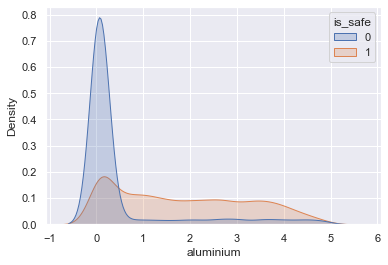

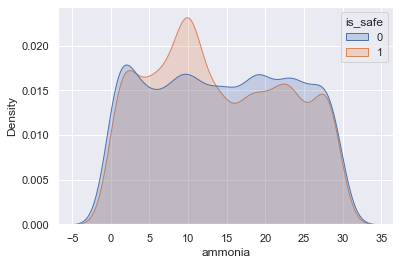

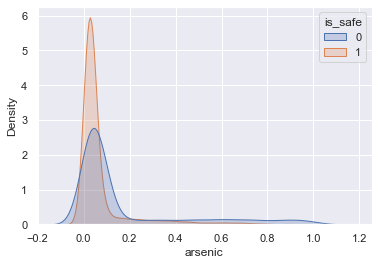

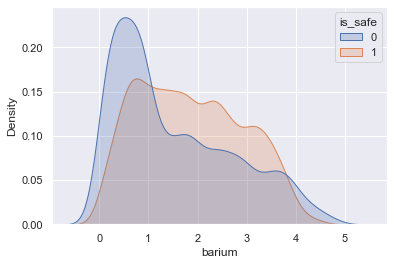

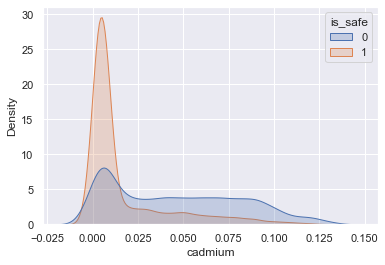

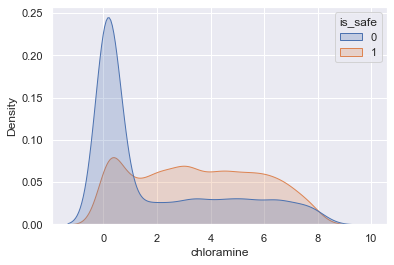

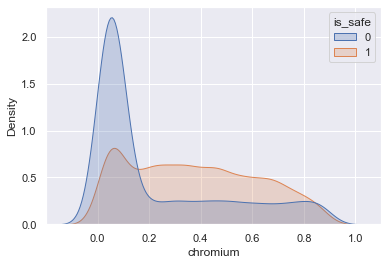

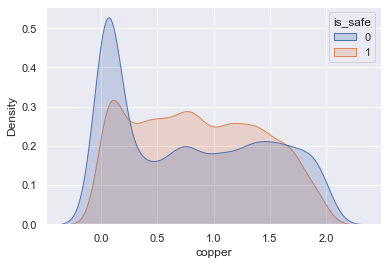

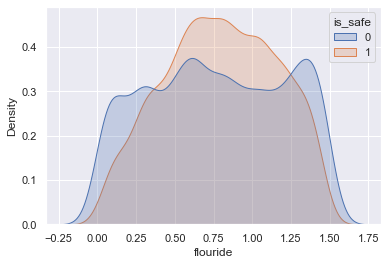

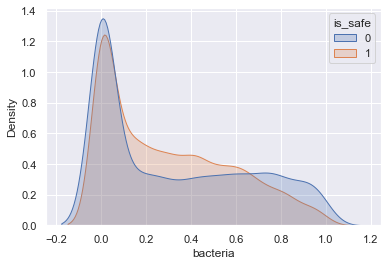

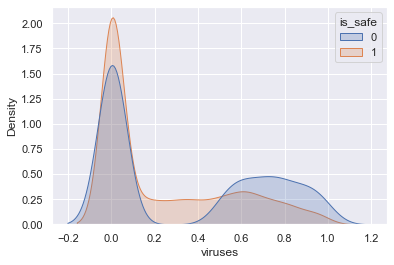

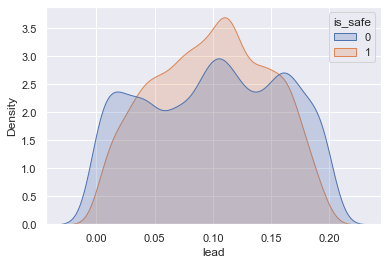

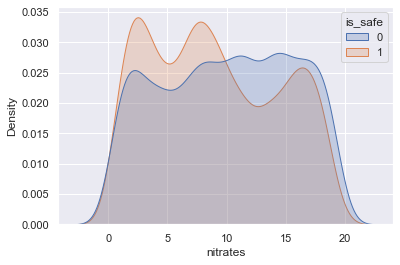

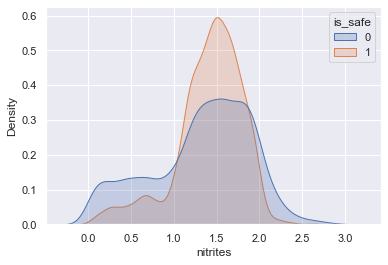

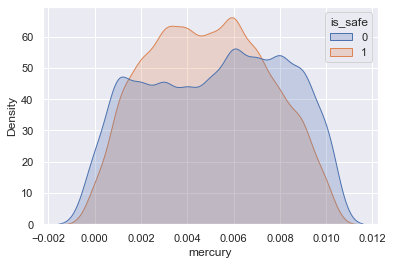

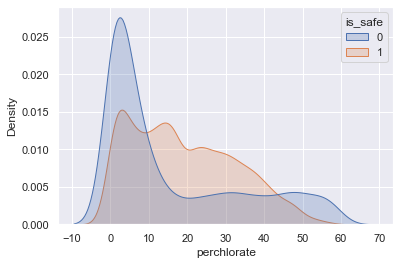

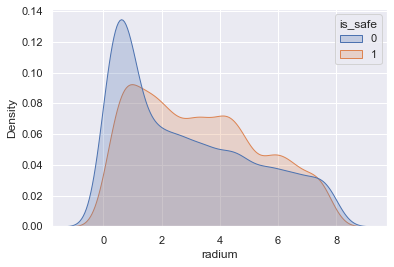

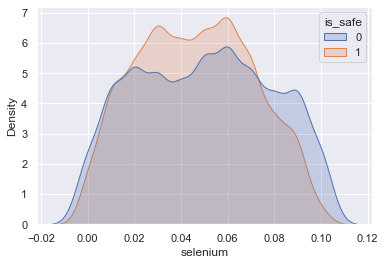

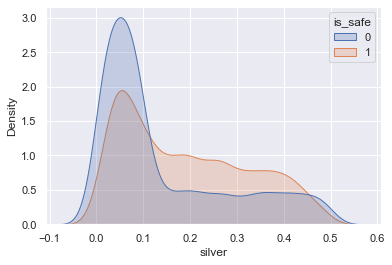

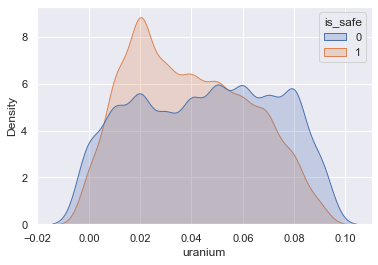

In [32]:
kdeplots(df4,df4["is_safe"])

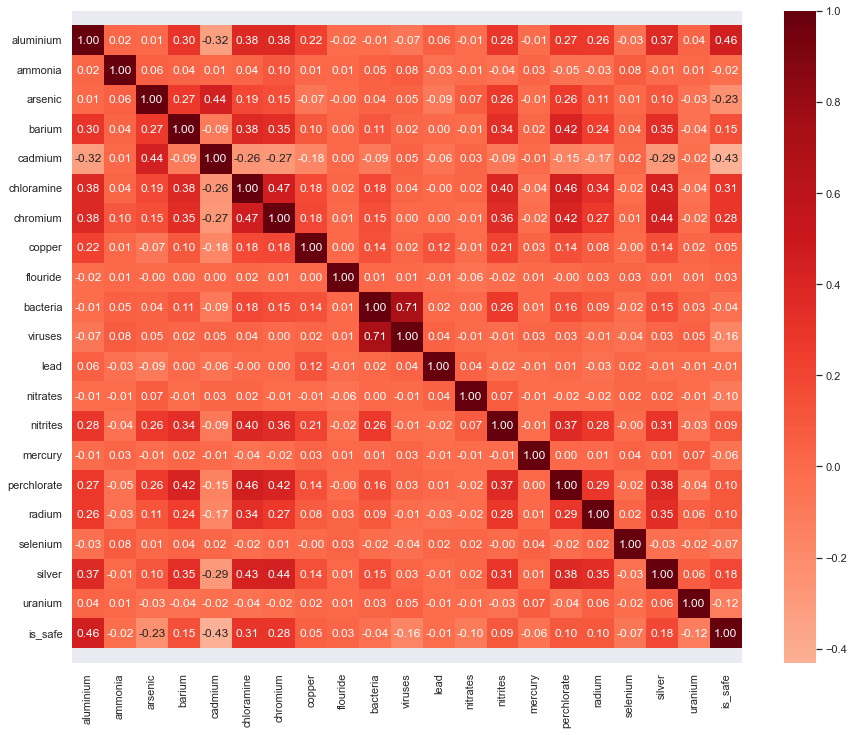

In [33]:
heatmaps(df4)

bacteria and viruses = 0.71


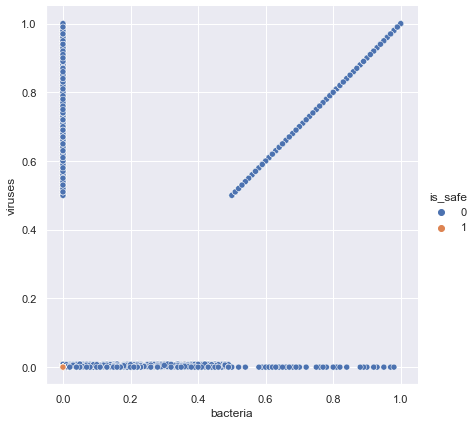

In [34]:
corplots4 = corplotsss()
corplots4.high_corr(df4)
corplots4.high_corr_plot()

In [35]:
sns.pairplot(df, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot")


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000273CDB538B0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.pairplot(df1, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot1")


In [ ]:
sns.pairplot(df2, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot2")


In [ ]:
sns.pairplot(df3, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot3")


In [ ]:
sns.pairplot(df4, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot4")


In [ ]:
# sns.violinplot(y=df1["silver"],x=df["is_safe"])